# Reading the dataset

In [3]:
import pandas as pd


In [4]:
dataset = pd.read_csv('creditcard.csv',sep=',')

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Class - 0 -- Normal Transaction
Class - 1 -- Fraud Transaction
Dataset -  Time , Amount and Class


# Data Analysis

In [7]:
import matplotlib.pyplot as plt

In [8]:
x = dataset[dataset['Class'] == 1].shape[0] #Fraud cases
y = dataset[dataset['Class'] == 0].shape[0] #Normal cases

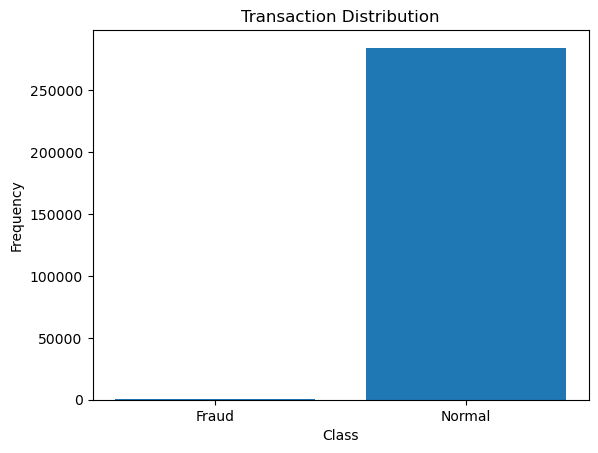

In [9]:
plt.bar(['Fraud', 'Normal'], [x, y])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Transaction Distribution')
plt.show()

In [10]:
fraud = dataset[dataset['Class'] == 1]
normal = dataset[dataset['Class'] == 0]

In [11]:
print(x,y) #count of dataset

492 284315


In [12]:

fraudamount = dataset[dataset['Class'] == 1]['Amount']
normalamount = dataset[dataset['Class'] == 0]['Amount']

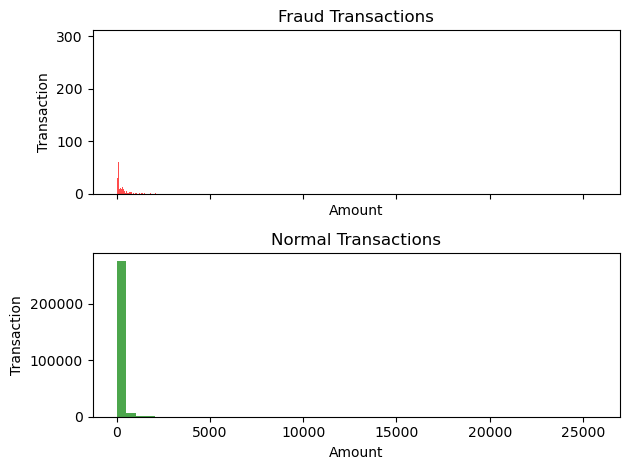

In [13]:
fig, axs = plt.subplots(2,1,sharex = True)
# Fraud Plot
axs[0].hist(fraudamount, bins=50, color='red', alpha=0.7)
axs[0].set_title('Fraud Transactions')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Transaction')
# Normal transactions
axs[1].hist(normalamount, bins=50, color='green', alpha=0.7)
axs[1].set_title('Normal Transactions')
axs[1].set_xlabel('Amount')
axs[1].set_ylabel('Transaction')

plt.tight_layout()
plt.show()

Shows that transaction amount for fraud is quite lower than that of normal case

taking smaller dataset 


In [14]:
new_dataset = dataset.sample(frac=0.2,random_state=1)
new_dataset.shape

(56961, 31)

In [15]:
print("original dataset shape:",dataset.shape)
print("new dataset shape:",new_dataset.shape)


original dataset shape: (284807, 31)
new dataset shape: (56961, 31)


In [16]:
fraudcases = new_dataset[new_dataset['Class']==1].shape[0]
normalcases = new_dataset[new_dataset['Class']==0].shape[0]

In [17]:
fraction = fraudcases/float(normalcases)

In [18]:
print(fraction)

0.0015296972254457222


In [19]:
import numpy as np

target = 'Class'
col = new_dataset.columns.tolist()
col = [c for c in col if c != 'Class']
state = np.random.RandomState(42)
X = new_dataset[col]
Y = new_dataset[target]
X_outliers = np.random.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)


(56961, 30)
(56961,)


ISOLATION FOREST ALGORITHM

In [20]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, max_samples='auto', contamination=fraction, random_state=state, verbose=0)


In [21]:


n_outliers = fraudcases

model.fit(X)


scores = model.decision_function(X)


y_pred = model.predict(X)

y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != Y).sum()

print("Number of errors:", n_errors)


Number of errors: 145


In [22]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(Y, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9974543986236196


In [24]:
from sklearn.metrics import classification_report


print("Classification Report:")
print(classification_report(Y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.17      0.17      0.17        87

    accuracy                           1.00     56961
   macro avg       0.58      0.59      0.59     56961
weighted avg       1.00      1.00      1.00     56961

